In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/SuperStoreOrders.csv')

# Basic overview
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


## Understand the data 

In [3]:
df.shape

(51290, 21)

In [4]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

## df.info() vs. df.info

##### df.info() is a method call that executes the info function on a pandas DataFrame (df). It prints a concise summary of the DataFrame to the console, including the index dtype, column names, data types, the count of non-null values in each column, and memory usage.

##### df.info is generally not used in this context. In Python, a name without parentheses refers to the underlying method or attribute object itself, rather than running it and returning a result. 

In [5]:
# data types and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

## df.describe() vs. df.describe

##### df.describe() is a method call that executes the describe function on a pandas DataFrame. It returns a new DataFrame containing descriptive statistics for the numerical columns (or all columns if specified with include='all'), such as count, mean, standard deviation, minimum, maximum, and percentile values (25%, 50%, 75%).

##### df.describe similarly refers to the bound method object itself, but does not perform the calculation or return the statistical summary. 

In [6]:
# statiscal summary

df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [7]:
# checking missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### ([[...]]) is essential for selecting multiple columns as a new DataFrame rather than a single Series. 

In [8]:
# checkind the date format

df[['order_date','ship_date']].dtypes


order_date    object
ship_date     object
dtype: object

### checking profit/loss
### Data Type Issues Identified
- Key numeric fields such as sales and profit are stored as object data types.
- Temporary numeric conversion was used for validation without altering raw data.
- The dataset contains negative profit values, indicating loss-making transactions.

### errors='coerce' 
- is a common parameter in pandas functions like `pd.to_numeric()` and `pd.to_datetime()` that tells the function to convert any unparseable or invalid data into a missing value (like NaN for numbers or NaT for dates) instead of raising an error, making it ideal for data cleaning when you expect mixed data types and want to keep processing. 

- df.lt(0) (or df < 0) performs an element-wise "less than" comparison, returning a boolean DataFrame indicating which cells in df have values strictly less than zero (negative numbers), useful for filtering or identifying negative data. It's a flexible method that supports comparison against scalars, Series, or other DataFrames, with options to specify the comparison axis. 



In [9]:
pd.to_numeric(df['sales'],errors='coerce').lt(0).sum()

0

In [10]:
pd.to_numeric(df['profit'],errors='coerce').lt(0).sum()

12543

In [11]:
sales_temp = pd.to_numeric(df['sales'], errors='coerce')
profit_temp = pd.to_numeric(df['profit'], errors='coerce')

(sales_temp < 0).sum(), (profit_temp < 0).sum()


(0, 12543)

In [12]:
sales_temp.isna().sum(), profit_temp.isna().sum()


(2630, 0)

In [13]:
df[sales_temp.isna()][['order_id','sales']].head(5)

,order_id,sales
27,MX-2011-111255,"1,648"
43,MX-2011-109267,"3,029"
58,CA-2011-167199,"2,574"
83,AO-2011-1670,"2,479"
84,IN-2011-19330,"2,174"


## Data cleaning and preparation

In [14]:
#  chicking null
problem_sales=df[sales_temp.isna()]
problem_sales.shape

(2630, 21)

- “I first investigated missing values to understand their context. Since sales is a primary business metric and missing values could distort revenue analysis, I removed a small percentage of affected records after validation.”

In [15]:
problem_sales[['order_id','sales','profit','quantity','discount']].head(5)

,order_id,sales,profit,quantity,discount
27,MX-2011-111255,"1,648",609.8400,6,0.0
43,MX-2011-109267,"3,029",999.3600,8,0.0
58,CA-2011-167199,"2,574",746.4078,9,0.0
83,AO-2011-1670,"2,479",49.5000,6,0.0
84,IN-2011-19330,"2,174",260.8200,7,0.0


### cleaning

In [16]:
# Rows where sales could not be converted
problem_sales = df[sales_temp.isna()]

problem_sales.shape

(2630, 21)

In [17]:
problem_sales[['order_id', 'sales', 'profit', 'quantity', 'discount']].head(10)

,order_id,sales,profit,quantity,discount
27,MX-2011-111255,"1,648",609.8400,6,0.0
43,MX-2011-109267,"3,029",999.3600,8,0.0
58,CA-2011-167199,"2,574",746.4078,9,0.0
83,AO-2011-1670,"2,479",49.5000,6,0.0
84,IN-2011-19330,"2,174",260.8200,7,0.0
100,IN-2011-61302,"2,875",511.0950,5,0.1
125,ES-2011-5158390,"1,384",13.7700,3,0.0
126,US-2011-163874,"1,323",238.0000,10,0.0
163,EG-2011-4270,"1,200",479.8800,4,0.0
173,CA-2011-157147,"1,326",238.6530,5,0.0


In [18]:
# Convert date columns
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Convert numeric columns
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

# Drop rows with missing sales
df_clean = df.dropna(subset=['sales']).copy()

df_clean.shape

(48660, 21)

#### VALIDATE CLEANED DATA (CRITICAL)

In [19]:
df_clean[['sales', 'profit']].dtypes

sales     float64
profit    float64
dtype: object

In [24]:
df[['order_date','ship_date']].dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

In [20]:
df_clean.isna().sum()

order_id              0
order_date        29588
ship_date         29830
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
year                  0
dtype: int64

In [21]:
(df_clean['sales'] < 0).sum(), (df_clean['profit'] < 0).sum()

(0, 12108)

####  SAVE CLEANED DATA

In [35]:
df_clean.to_csv('../data/cleaned/clean_superstore.csv', index=False)

### EXPLORATORY DATA ANALYSIS (EDA)

#### SALES & PROFIT OVER TIME

In [25]:
import matplotlib.pyplot as plt

# Monthly trend
monthly_trend = (
    df_clean
    .set_index('order_date')
    .resample('M')
    .agg({'sales': 'sum', 'profit': 'sum'})
)

monthly_trend.head()


,sales,profit
order_date,,
2011-01-31,50437.0,5403.75028
2011-02-28,54400.0,5746.95620
2011-03-31,51789.0,4475.11380
2011-04-30,39497.0,4183.41044
2011-05-31,37097.0,4151.72474


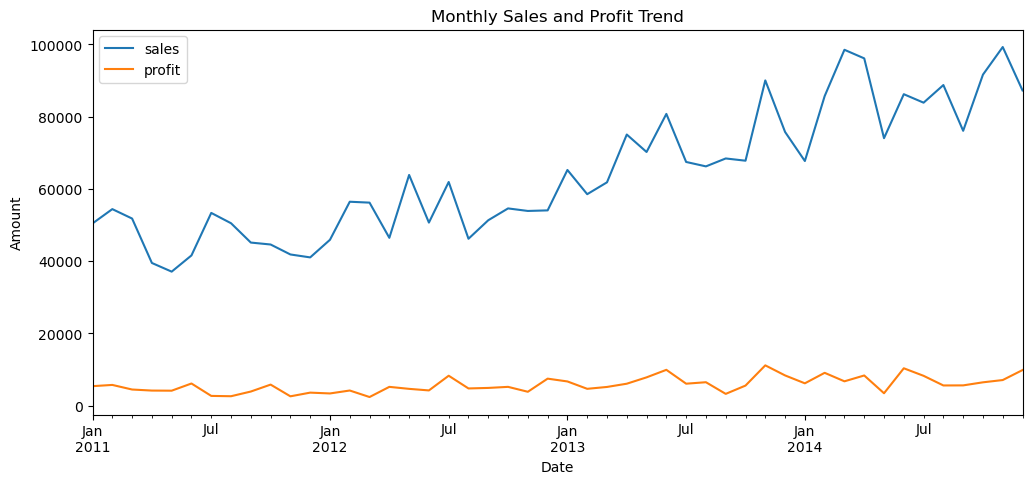

In [26]:
monthly_trend.plot(figsize=(12,5))
plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


#### CATEGORY & SUB-CATEGORY PERFORMANCE

In [28]:
category_perf = (
    df_clean
    .groupby('category')[['sales', 'profit']]
    .sum()
    .sort_values(by='sales', ascending=False)
)

category_perf


,sales,profit
category,,
Office Supplies,2790258.0,350107.32450
Technology,2638265.0,267573.47238
Furniture,2406605.0,97049.37790


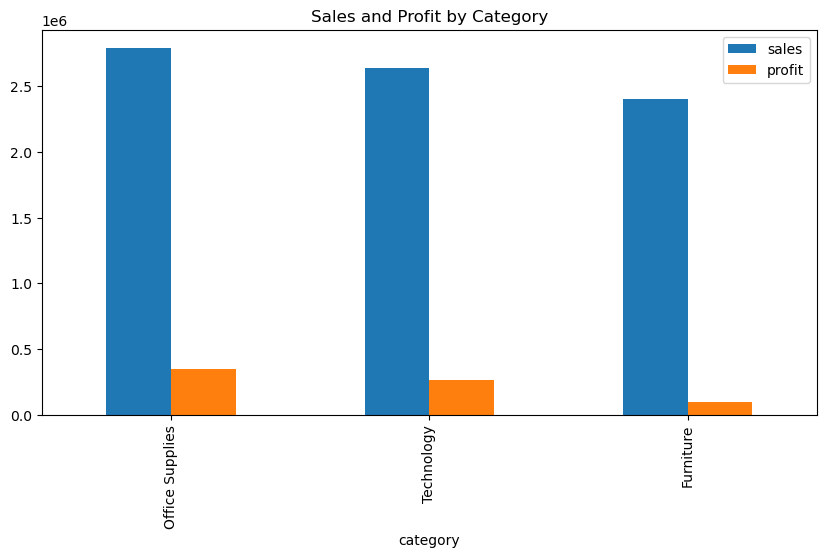

In [29]:
category_perf.plot(kind='bar', figsize=(10,5))
plt.title('Sales and Profit by Category')
plt.show()


#### REGION & MARKET ANALYSIS

In [30]:
region_perf = (
    df_clean
    .groupby('region')[['sales', 'profit']]
    .sum()
    .sort_values(by='profit', ascending=False)
)

region_perf


,sales,profit
region,,
Central,1806638.0,168764.86940
North,790546.0,106622.10832
North Asia,453686.0,86676.69300
Central Asia,389506.0,66450.97000
South,1031101.0,63754.84690
West,424173.0,57373.85650
Oceania,625382.0,54548.28600
East,366492.0,42644.30580
Africa,538115.0,30140.61900


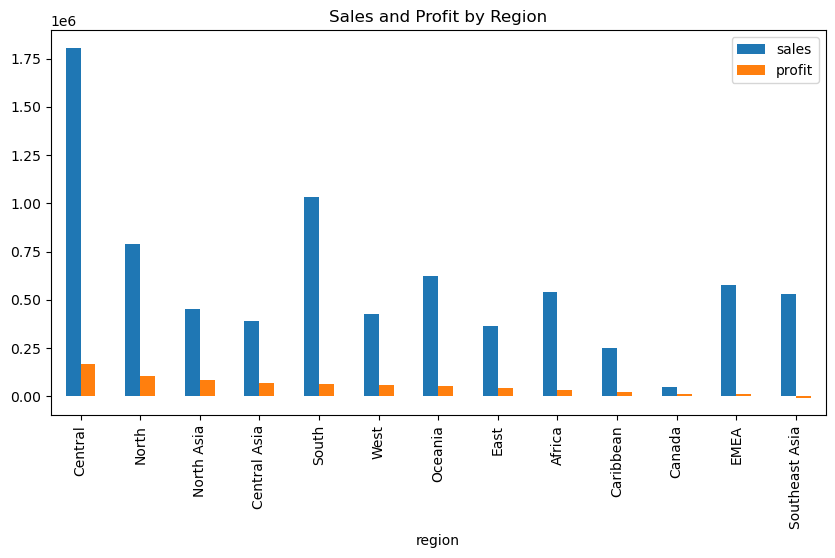

In [31]:
region_perf.plot(kind='bar', figsize=(10,5))
plt.title('Sales and Profit by Region')
plt.show()


#### DISCOUNT vs PROFIT (VERY IMPORTANT)

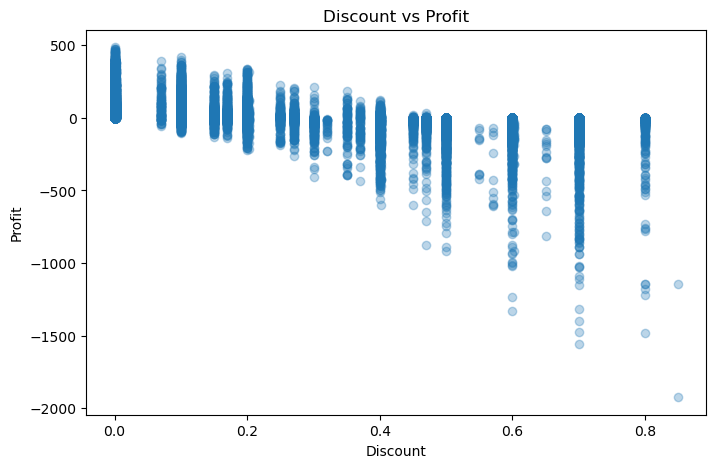

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['discount'], df_clean['profit'], alpha=0.3)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


#### LOSS-MAKING PRODUCTS

In [33]:
loss_products = (
    df_clean[df_clean['profit'] < 0]
    .groupby('sub_category')['profit']
    .sum()
    .sort_values()
)

loss_products.head(10)


sub_category
Tables        -91270.48340
Bookcases     -82803.67770
Storage       -73632.89170
Chairs        -71272.04650
Phones        -67798.10540
Copiers       -62613.20988
Machines      -49703.13480
Appliances    -41852.73410
Accessories   -37437.11380
Binders       -34885.31650
Name: profit, dtype: float64